# Clustering

Clustering is an unsupervised learning technique useful to find similarity amongst data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load and plot data

In [3]:
df = pd.read_csv('../data/iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
import seaborn as sns

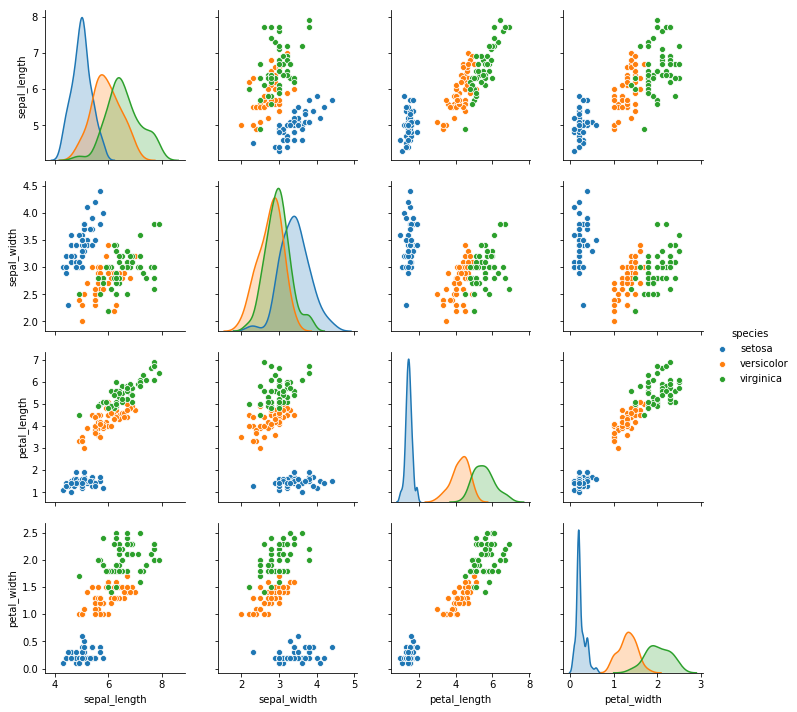

In [6]:
sns.pairplot(df, hue='species');

## Encode labels

In [7]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
df['target_n'] = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

## Kmeans clustering

In [46]:
from sklearn.cluster import KMeans

X = df[['sepal_length','sepal_width','petal_length','petal_width']]
km = KMeans(n_clusters=3, init='random')
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:
km.__dict__

{'n_clusters': 3,
 'init': 'random',
 'max_iter': 300,
 'tol': 0.0001,
 'precompute_distances': 'auto',
 'n_init': 10,
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'n_jobs': 1,
 'algorithm': 'auto',
 'cluster_centers_': array([[5.006     , 3.428     , 1.462     , 0.246     ],
        [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
        [6.85      , 3.07368421, 5.74210526, 2.07105263]]),
 'labels_': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
        2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32),
 'inertia_': 78.85144142614601,
 'n_iter_': 8}

In [48]:
km.getattr

AttributeError: 'KMeans' object has no attribute 'getattr'

In [49]:
centers = km.cluster_centers_
centers

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

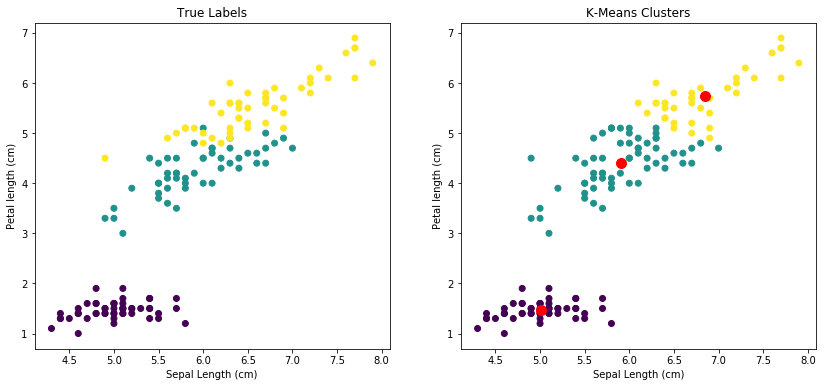

In [50]:
plt.figure(figsize = (14,6))
plt.subplot(121)
plt.scatter(df.sepal_length, df.petal_length, c=df['target_n'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('True Labels')

plt.subplot(122)
plt.scatter(df.sepal_length, df.petal_length, c=km.labels_)
plt.scatter(centers[:,0], centers[:,2], marker='o', c='r', s=100)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('K-Means Clusters')
plt.draw()
plt.show()


### Exercise 1
- discuss with your pair:
    - why do cluster centers have 4 coordinates?
    - do the colors in the two plots coincide? Why?
- change the number of clusters using the n_clusters parameter. What happens?
- change the initialization parameters of KMeans to 'random'. What happens?
- run the clustering multiple times, do the centroid positions change?

### Exercise 2
- calculate silhouette_score for different values of k. You will have to extract the labels from km at different values of k
- plot the silhouette score as a function of k for k between 2 and 10
- discuss with your pair:
    - what value of k gives the highest silhouette score?
    - did you expect that result?

### Exercise 3

Try clustering with another method of the ones you find here: http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html


In [67]:
from sklearn import cluster
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
dbscan = cluster.DBSCAN()
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [68]:
dbscan.__dict__

{'eps': 0.5,
 'min_samples': 5,
 'metric': 'euclidean',
 'metric_params': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'p': None,
 'n_jobs': 1,
 'core_sample_indices_': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  16,  17,  19,  20,  21,  23,  24,  25,  26,  27,  28,  29,
         30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  42,  43,
         44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
         58,  61,  63,  65,  66,  67,  69,  70,  71,  72,  73,  74,  75,
         76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  88,  89,
         90,  91,  92,  94,  95,  96,  97,  99, 101, 102, 103, 104, 110,
        111, 112, 115, 116, 120, 121, 123, 124, 125, 126, 127, 128, 132,
        133, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 149]),
 'labels_': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        

In [70]:
labels = dbscan.labels_
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    print(xy)
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('DBSCAN Clusters')

    sepal_length  sepal_width  petal_length  petal_width
0            5.1          3.5           1.4          0.2
1            4.9          3.0           1.4          0.2
2            4.7          3.2           1.3          0.2
3            4.6          3.1           1.5          0.2
4            5.0          3.6           1.4          0.2
5            5.4          3.9           1.7          0.4
6            4.6          3.4           1.4          0.3
7            5.0          3.4           1.5          0.2
8            4.4          2.9           1.4          0.2
9            4.9          3.1           1.5          0.1
10           5.4          3.7           1.5          0.2
11           4.8          3.4           1.6          0.2
12           4.8          3.0           1.4          0.1
13           4.3          3.0           1.1          0.1
16           5.4          3.9           1.3          0.4
17           5.1          3.5           1.4          0.3
19           5.1          3.8  

TypeError: unhashable type: 'slice'

### Exercise 4

In the data folder you can find two more datasets ready for clustering:

- `../data/Wholesale customers data.csv`
- `../data/Absenteeism_at_work.csv`


Choose one and repeat the following steps:

1. Load the dataset
- Inspect it with `.read()` and `.info()`
- decide which features you are going to use for clustering (hint: categorical features are tricky, you may want to ignore them for now)
- rescale the features
- train K-Means and find the optimal value of K using the silhouette coefficient
- does the dataset cluster well?
- train DBSSCAN and check the number of clusters found
- inspect a couple of clusters and see if you can describe the members

In [ ]:
pd.Series(dbscan.labels_).value_counts().head(20)